   Patient Demographics and Clinical Features  \
0                                   anion_gap   
1                                     albumin   
2                                 bicarbonate   
3                                  creatinine   
4                                    chloride   
5                            glucose_bloodgas   
6                            hematocrit_blood   
7                         hemoglobin_bloodgas   
8                                     lactate   
9                              platelet_count   
10                            potassium_blood   
11                                        ptt   
12                                     inr_pt   
13                                     sodium   
14                                        bun   
15                              calcium_total   
16                               free_calcium   
17                                       spo2   

   Number of Missing Values (proportion %)  \
0                     

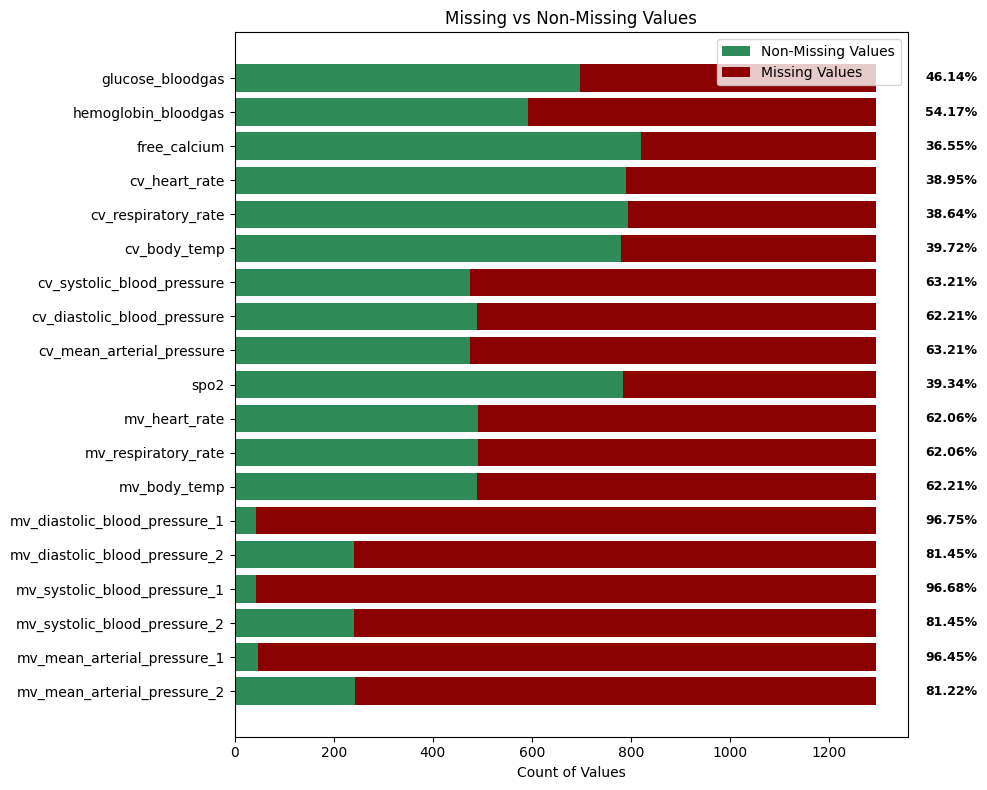

In [4]:
#Summary Statistics and Missing Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from matplotlib.colors import TwoSlopeNorm

# Load the dataset
file_path = 'CDIraw.csv'
data_df = pd.read_csv(file_path)

# Summary statistics for selected variables
def generate_summary_statistics(data_df, variables):
    table_1 = {
        "Patient Demographics and Clinical Features": [],
        "Number of Missing Values (proportion %)": [],
        "Median (IQR) or Non-null Count (proportion %)": []
    }
    for var in variables:
        if var in data_df.columns:
            table_1["Patient Demographics and Clinical Features"].append(var)
            missing_count = data_df[var].isnull().sum()
            missing_proportion = (missing_count / len(data_df)) * 100
            table_1["Number of Missing Values (proportion %)"]
            table_1["Number of Missing Values (proportion %)"] = f"{missing_count} ({missing_proportion:.2f}%)"
            if data_df[var].dtype in ['float64', 'int64']:
                median = data_df[var].median()
                iqr = data_df[var].quantile(0.75) - data_df[var].quantile(0.25)
                table_1["Median (IQR) or Non-null Count (proportion %)"] = f"{median} ({iqr})"
            else:
                non_null_count = data_df[var].notnull().sum()
                non_null_proportion = (non_null_count / len(data_df)) * 100
                table_1["Median (IQR) or Non-null Count (proportion %)"]
                table_1.append(f"{non_null_count} ({non_null_proportion:.2f}%)")
    return pd.DataFrame(table_1)

variables = [
    'GENDER', 'age_days', 'HOSPITAL_EXPIRE_FLAG', 'anion_gap', 'albumin', 'bicarbonate',
    'creatinine', 'chloride', 'glucose_bloodgas', 'hematocrit_blood', 'hemoglobin_bloodgas',
    'lactate', 'platelet_count', 'potassium_blood', 'ptt', 'inr_pt', 'sodium', 'bun', 'wbc',
    'calcium_total', 'free_calcium', 'heart_rate', 'respiratory_rate', 'spo2',
    'body_temperature', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'mean_arterial_pressure'
]

table_1_df = generate_summary_statistics(data_df, variables)
print(table_1_df)

# Calculate missing and non-missing values for each variable
def plot_missing_data(data_df):
    missing_data_summary = data_df.isnull().sum().to_frame(name='Missing Count')
    missing_data_summary['Non-Missing Count'] = data_df.notnull().sum()
    missing_data_summary['Missing Percentage (%)'] = (missing_data_summary['Missing Count'] / len(data_df)) * 100

    # Sort by missing percentage and filter features with missing percentage > 20%
    filtered_summary = missing_data_summary[missing_data_summary['Missing Percentage (%)'] > 20]

    # Plot missing vs non-missing values using a stacked bar chart
    features = filtered_summary.index
    missing_values = filtered_summary['Missing Count']
    non_missing_values = filtered_summary['Non-Missing Count']
    missing_percentages = filtered_summary['Missing Percentage (%)']

    fig, ax = plt.subplots(figsize=(10, 8))
    bars_non_missing = ax.barh(features, non_missing_values, color='seagreen', label='Non-Missing Values')
    bars_missing = ax.barh(features, missing_values, left=non_missing_values, color='darkred', label='Missing Values')

    # Annotate each missing bar with the missing percentage
    for bar, percentage in zip(bars_missing, missing_percentages):
        ax.text(bar.get_x() + bar.get_width() + 100, bar.get_y() + bar.get_height() / 2,
                f'{percentage:.2f}%', va='center', ha='left', fontsize=9, color='black', fontweight='bold')

    ax.set_xlabel('Count of Values')
    ax.set_title('Missing vs Non-Missing Values')
    ax.legend(loc='upper right')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_missing_data(data_df)

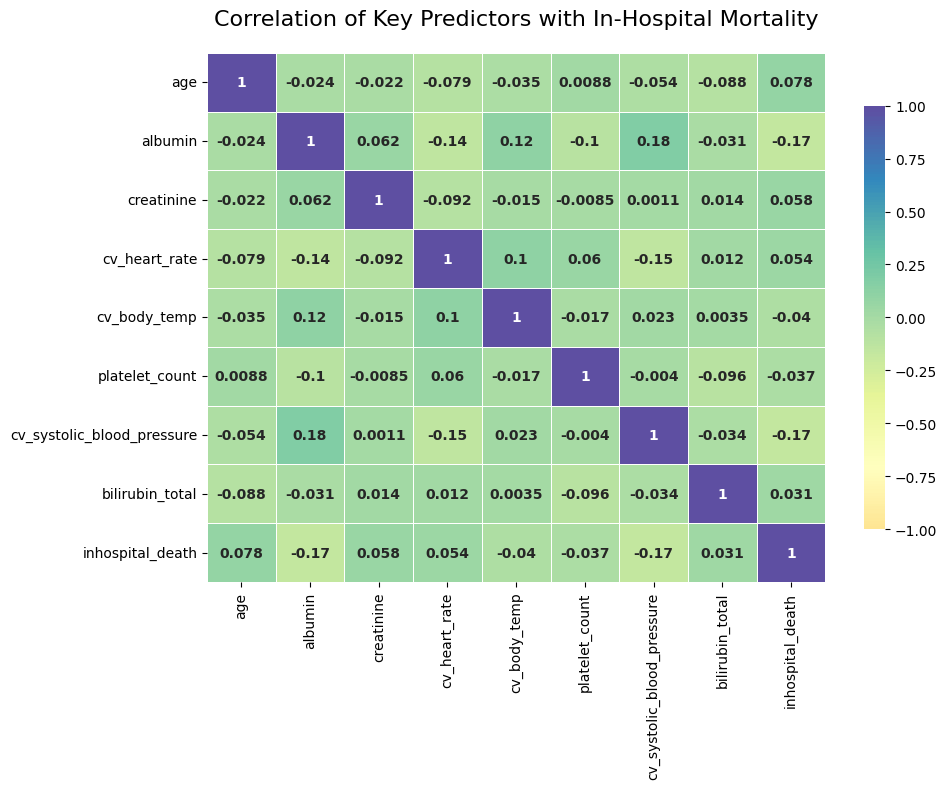

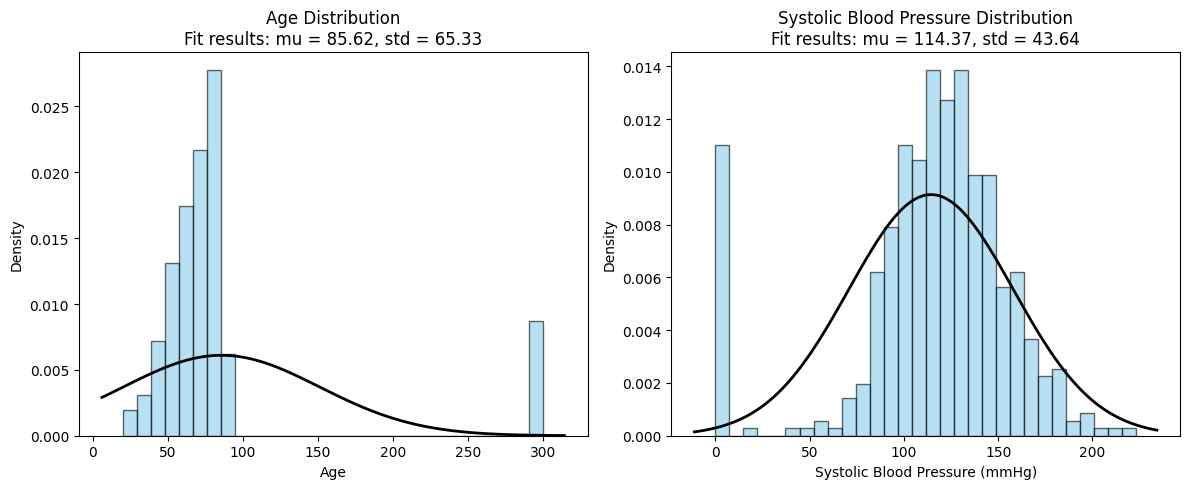

In [5]:
# Correlation Analysis and Histograms
# Correlation heatmap for key predictors and mortality
def plot_correlation_heatmap(data_df, key_predictors):
    correlation_matrix = data_df[key_predictors].corr()
    plt.figure(figsize=(10, 8))
    cmap = sns.color_palette("Spectral", as_cmap=True)
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, linewidths=0.5, linecolor='white',
                cbar_kws={"shrink": 0.8}, annot_kws={"size": 10, "weight": "bold"},
                norm=TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1))
    plt.title('Correlation of Key Predictors with In-Hospital Mortality', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

key_predictors = [
    'age', 'albumin', 'creatinine', 'cv_heart_rate', 'cv_body_temp',
    'platelet_count', 'cv_systolic_blood_pressure', 'bilirubin_total', 'inhospital_death'
]

plot_correlation_heatmap(data_df, key_predictors)

# Histogram for selected features
def plot_histogram_with_curve(data, ax, title, xlabel):
    data = data.dropna()
    ax.hist(data, bins=30, density=True, color='skyblue', alpha=0.6, edgecolor='black')
    mu, std = stats.norm.fit(data)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)
    ax.set_title(f"{title}\nFit results: mu = {mu:.2f}, std = {std:.2f}")
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_histogram_with_curve(data_df['age'], axes[0], 'Age Distribution', 'Age')
plot_histogram_with_curve(data_df['cv_systolic_blood_pressure'], axes[1], 'Systolic Blood Pressure Distribution', 'Systolic Blood Pressure (mmHg)')
plt.tight_layout()
plt.show()

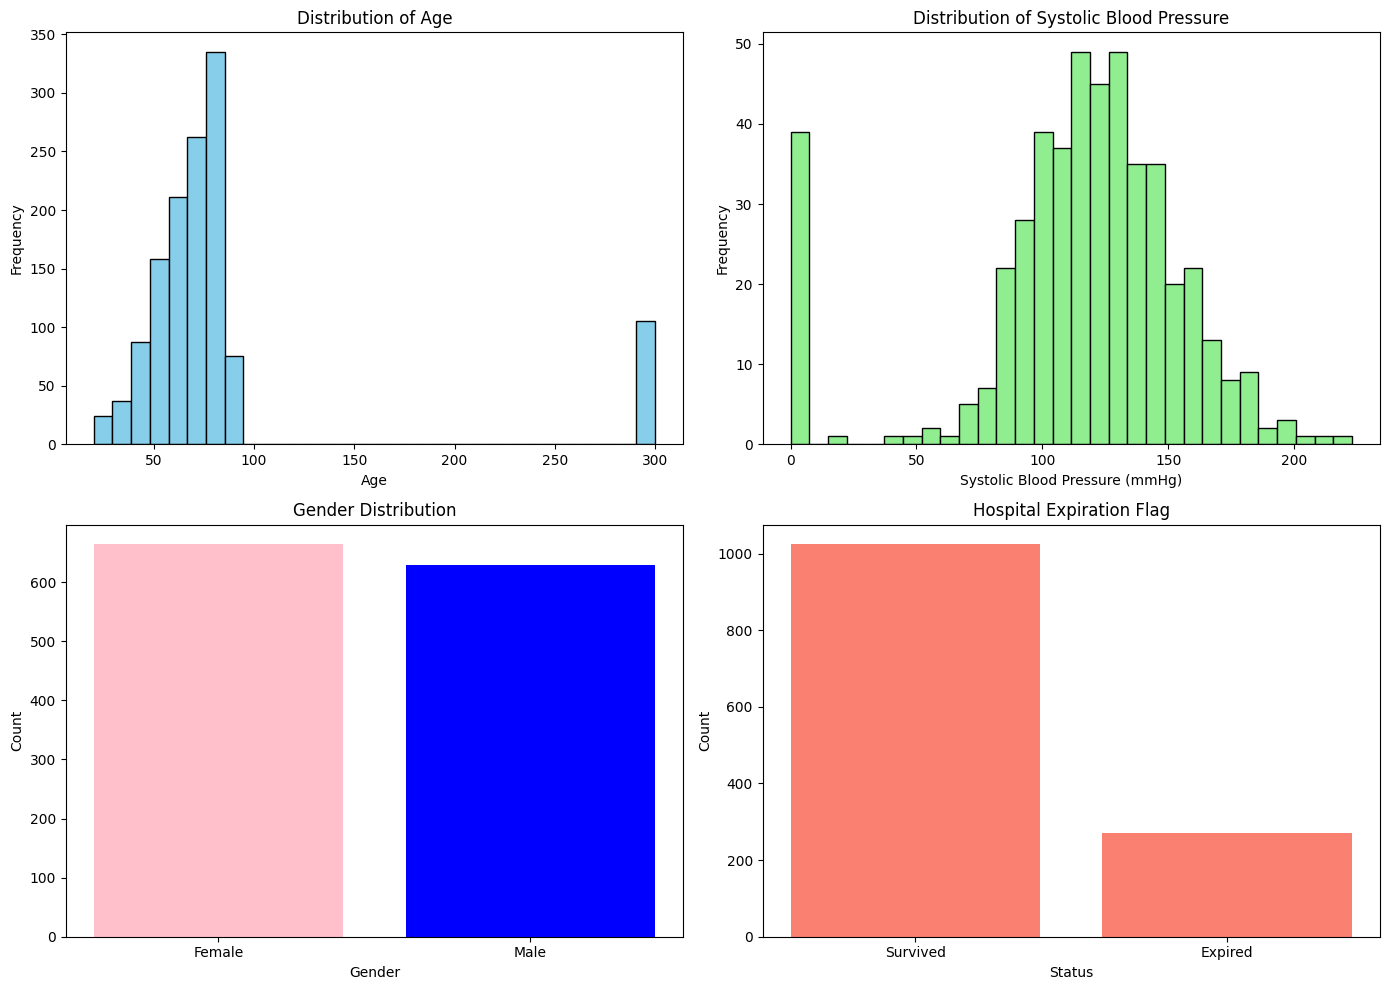

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'CDIraw.csv'  # Adjusted to your file name
data_df = pd.read_csv(file_path)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for age
axes[0, 0].hist(data_df['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Histogram for systolic blood pressure
axes[0, 1].hist(data_df['cv_systolic_blood_pressure'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Systolic Blood Pressure')
axes[0, 1].set_xlabel('Systolic Blood Pressure (mmHg)')
axes[0, 1].set_ylabel('Frequency')

# Bar chart for gender distribution
gender_counts = data_df['gender_binaried'].value_counts()
axes[1, 0].bar(['Female', 'Male'], gender_counts.values, color=['pink', 'blue'])
axes[1, 0].set_title('Gender Distribution')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Bar chart for hospital expiration flag
expire_flag_counts = data_df['inhospital_death'].value_counts()
axes[1, 1].bar(expire_flag_counts.index.map({0: 'Survived', 1: 'Expired'}), expire_flag_counts.values, color='salmon')
axes[1, 1].set_title('Hospital Expiration Flag')
axes[1, 1].set_xlabel('Status')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


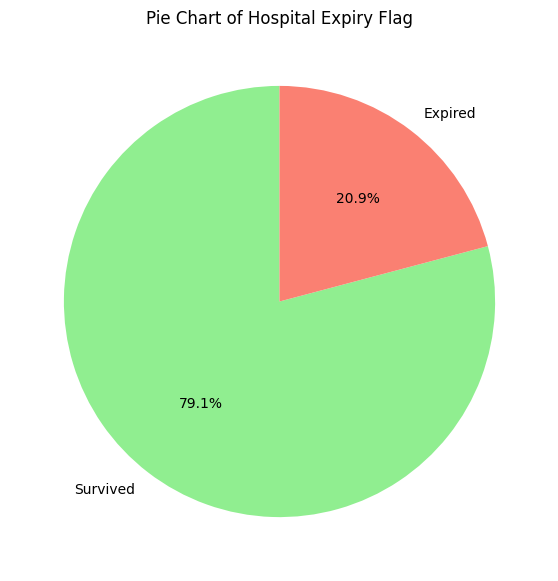

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'CDIraw.csv'
data_df = pd.read_csv(file_path)

fig, ax = plt.subplots(figsize=(7, 7))

# Pie chart for hospital expiration flag
expire_flag_counts = data_df['inhospital_death'].value_counts()
ax.pie(expire_flag_counts, labels=expire_flag_counts.index.map({0: 'Survived', 1: 'Expired'}), autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
ax.set_title('Pie Chart of Hospital Expiry Flag')

plt.show()
